In [158]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env
import prepare
import acquire

from scipy.stats import mannwhitneyu


In [3]:
df_iris=acquire.get_iris_data()


In [4]:
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [6]:
df_iris=prepare.prep_iris()


In [7]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
train, validate, test = prepare.train_validate_test(df_iris, 'species')

In [10]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


In [90]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.781111,3.023333,3.728889,1.191111
std,0.792081,0.434741,1.710526,0.757679
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.725000,1.600000,0.325000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

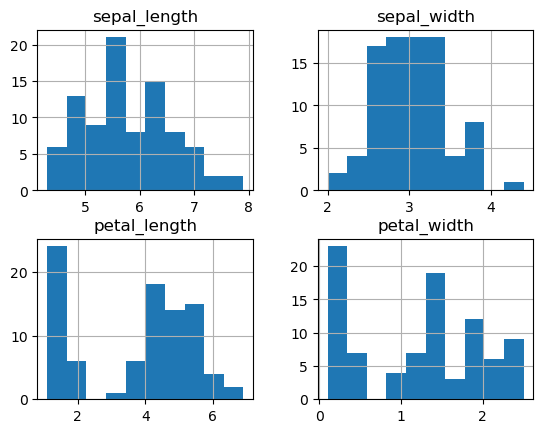

In [80]:
train.hist()

In [176]:
# For each measurement type, calculate the descriptive statistics grouped by species
measurement_types = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']

for measurement_type in measurement_types:
    print(f"Descriptive statistics for {measurement_type} grouped by species:")
    print(train.groupby('species')[measurement_type].describe())
    print("\n")

Descriptive statistics for petal_width grouped by species:
            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       30.0  0.256667  0.100630  0.1  0.2  0.20  0.300  0.5
versicolor   30.0  1.283333  0.170361  1.0  1.2  1.30  1.375  1.6
virginica    30.0  2.033333  0.277095  1.4  1.8  2.05  2.300  2.5


Descriptive statistics for petal_length grouped by species:
            count      mean       std  min  25%  50%    75%  max
species                                                         
setosa       30.0  1.510000  0.178789  1.1  1.4  1.5  1.600  1.9
versicolor   30.0  4.196667  0.444494  3.0  4.0  4.2  4.500  5.1
virginica    30.0  5.480000  0.508141  4.5  5.1  5.5  5.675  6.9


Descriptive statistics for sepal_length grouped by species:
            count      mean       std  min    25%  50%    75%  max
species                                                           
setosa       30.0  4.993333 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

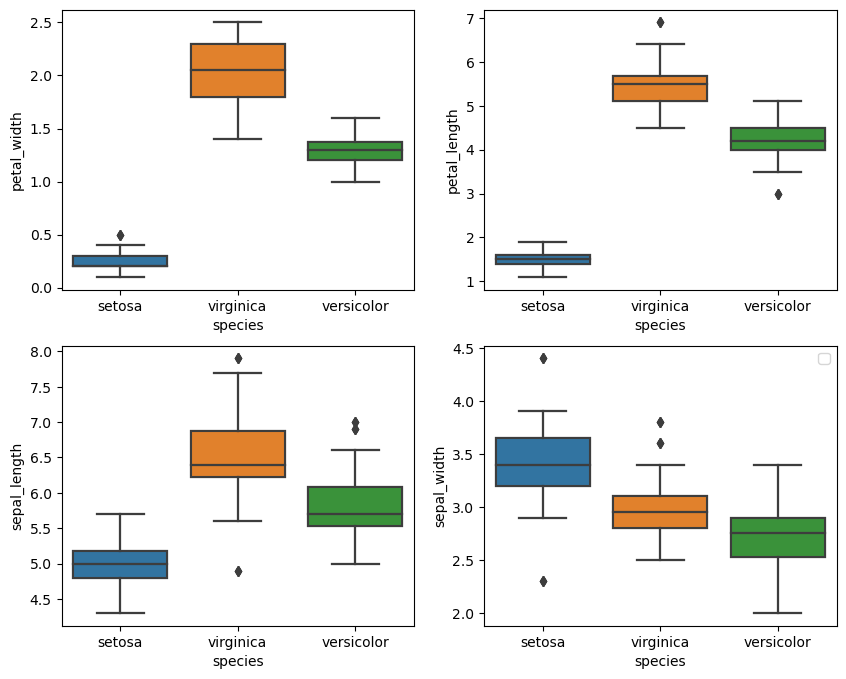

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for species in train.species.unique():
    sns.boxplot(data=train, x='species', y='petal_width', ax=axes[0,0])
    sns.boxplot(data=train, x='species', y='petal_length', ax=axes[0,1])
    sns.boxplot(data=train, x='species', y='sepal_length', ax=axes[1,0])
    sns.boxplot(data=train, x='species', y='sepal_width', ax=axes[1,1])
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

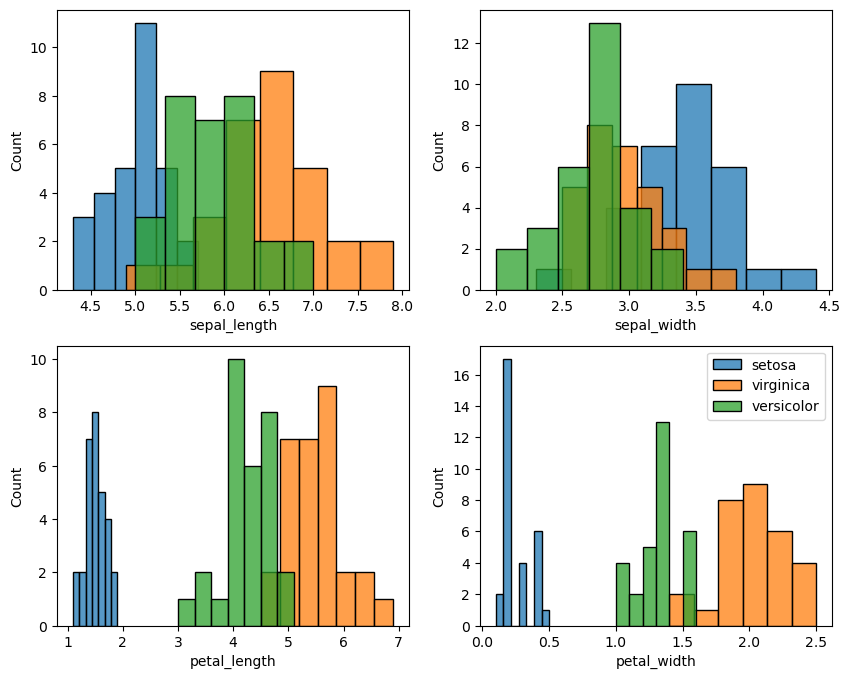

In [185]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for species in train.species.unique():
    sns.histplot(train[train.species == species].sepal_length, label=species, ax=axes[0,0])
    sns.histplot(train[train.species == species].sepal_width, label=species, ax=axes[0,1])
    sns.histplot(train[train.species == species].petal_length, label=species, ax=axes[1,0])
    sns.histplot(train[train.species == species].petal_width, label=species, ax=axes[1,1])
plt.legend()
plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

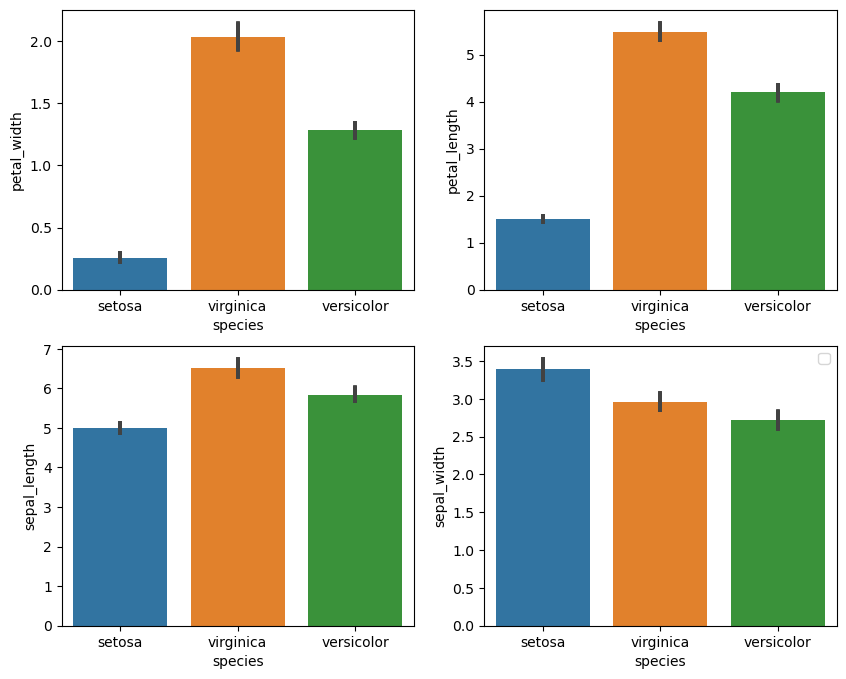

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for species in train.species.unique():
    sns.barplot(data=train, x='species', y='petal_width', ax=axes[0,0])
    sns.barplot(data=train, x='species', y='petal_length', ax=axes[0,1])
    sns.barplot(data=train, x='species', y='sepal_length', ax=axes[1,0])
    sns.barplot(data=train, x='species', y='sepal_width', ax=axes[1,1])

plt.legend()
plt.show

Setosa's have a high concentration around petal length and a sepal length between 5 and 5.25.  Versicolor sepal length
is more evenly distributed but the sepal and petal width are largely distributed into a smaller big.  
Virginica seems to most closely follow a tendency to normally distribute across petal and sepal measurements

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


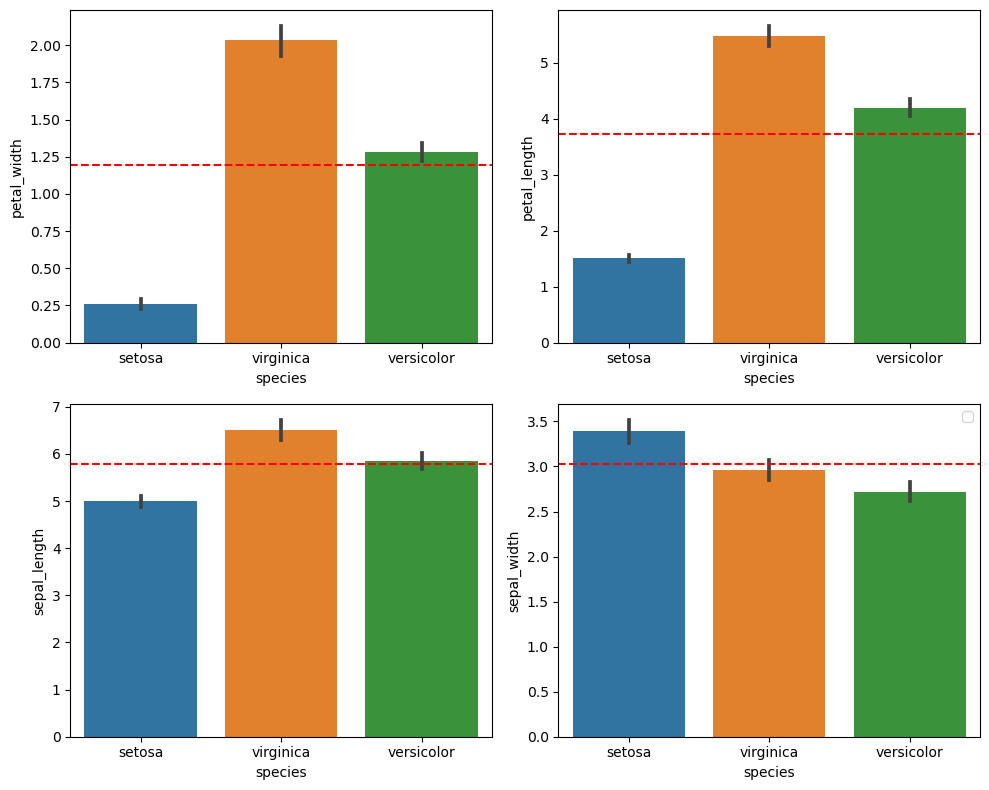

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes makes able to iterate over a 2D array by turning it into 1D array
axes = axes.flatten()

# Iterate over each measurement type
measurement_types = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']

for i, measurement_type in enumerate(measurement_types):
    # Plot barplot for each species
    sns.barplot(data=train, x='species', y=measurement_type, ax=axes[i])

    # Add horizontal line for the overall mean of the metric
    overall_mean = train[measurement_type].mean()
    axes[i].axhline(y=overall_mean, color='red', linestyle='--', label=f'Overall Mean ({overall_mean:.2f})')
    plt.legend()

#     # Add labels and title for each subplot
#     axes[i].set_xlabel('Species')
#     axes[i].set_ylabel(measurement_type.capitalize())
#     axes[i].set_title(f'Bar Plot for {measurement_type.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()




For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to 
    see if there is a significant difference between the two groups. Do the same for the other measurement types

In [159]:
# Select data for Virginica and Versicolor species
virginica_data = train[train['species'] == 'virginica']
versicolor_data = train[train['species'] == 'versicolor']

# Measurement types to compare
measurement_types = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']

# Perform Mann-Whitney U test for each measurement type
for measurement_type in measurement_types:
    stat, p_value = mannwhitneyu(virginica_data[measurement_type], versicolor_data[measurement_type])
    
    print(f"Mann-Whitney U test for {measurement_type}:")
    print(f"   U Statistic: {stat}")
    print(f"   P-value: {p_value}")
    
    if p_value < 0.05:
        print("   There is a significant difference between the two groups.")
    else:
        print("   There is no significant difference between the two groups.")
    
    print("\n")


Mann-Whitney U test for petal_width:
   U Statistic: 889.0
   P-value: 7.12423012584302e-11
   There is a significant difference between the two groups.


Mann-Whitney U test for petal_length:
   U Statistic: 884.0
   P-value: 1.368106833576727e-10
   There is a significant difference between the two groups.


Mann-Whitney U test for sepal_length:
   U Statistic: 738.0
   P-value: 2.0617069812153646e-05
   There is a significant difference between the two groups.


Mann-Whitney U test for sepal_width:
   U Statistic: 627.5
   P-value: 0.00844990346320156
   There is a significant difference between the two groups.


